In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

## Define functions

In [8]:
def plot_hexbin_feat_abundance(vamp_struc_ddg_df, struc_feat, xlabel, resi_level=False):
    """
    Function for plotting variant abundance scores against various structural 
    features using the matplotlib.pyplot.hexbin function. 
    """
    # define protein names
    pdbid_protname_dict = {
        'P60484':'PTEN', 'P51580':'TPMT', 'P11712':'CYP2C9',
        'Q9NV35':'NUDT15', 'P45381':'ASPA', 'O60260':'PRKN'
        }

    # set global figure parameters
    plt.rcParams['font.size'] = '15'
    fig = plt.figure(figsize=(14,8))
    count = 0

    # loop through proteins to add individual plots
    for pdbid in ["P60484","P51580","P11712","Q9NV35","P45381","O60260"]:

        df = vamp_struc_ddg_df.groupby("pdbid").get_group(pdbid)
        df = df.dropna(subset=[struc_feat])

        if resi_level == True:
            df = df.groupby("resi").mean()
            ylabel = "Average abundance score"
            gridsize = 65
            vmax = 10
        else:
            ylabel = "Abundance score"
            gridsize = 100
            vmax = 25
    
        abundance_arr = df["abundance_score"].values
        struc_feat_arr = df[struc_feat].values

        # calculate correlation coefficients
        pearsonr = scipy.stats.pearsonr(struc_feat_arr,abundance_arr)[0]
        pearsonr = str(np.around(pearsonr,2))
        spearmanr = scipy.stats.spearmanr(struc_feat_arr,abundance_arr)[0]
        spearmanr = str(np.around(spearmanr,2))

        # plot
        count += 1
        ax = plt.subplot(2,3,count)
        plt.hexbin(
            struc_feat_arr,abundance_arr,mincnt=1,cmap=sns.color_palette("crest", as_cmap=True),
            gridsize=(gridsize),bins='log',vmin=1,vmax=vmax
        )
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(pdbid_protname_dict[pdbid])

        if struc_feat == "rASA":
            plt.xlim(-0.05,1)
        if struc_feat == "WCN":
            plt.xlim(-1,30)
        
        # annotate with correlation coefficient
        if struc_feat == "rASA":
            plt.annotate(f'$r_s$ = {spearmanr} \n$r$  = {pearsonr}', 
                          xy=(0.67,0.1),xycoords='axes fraction', fontsize=16)
        else:
            plt.annotate(f'$r_s$ = {spearmanr} \n$r$  = {pearsonr}', 
                         xy=(0.67,0.80),xycoords='axes fraction', fontsize=16)

    plt.tight_layout()

## Run calculations and plot results

In [3]:
# get dataframe that for each variant has its vampseq score, a Rosetta ddG and the per residue rASA and WCN values
vamp_struc_ddg_df = pd.read_csv("../output/structure_features/vamp_struc_ddg_df.csv")

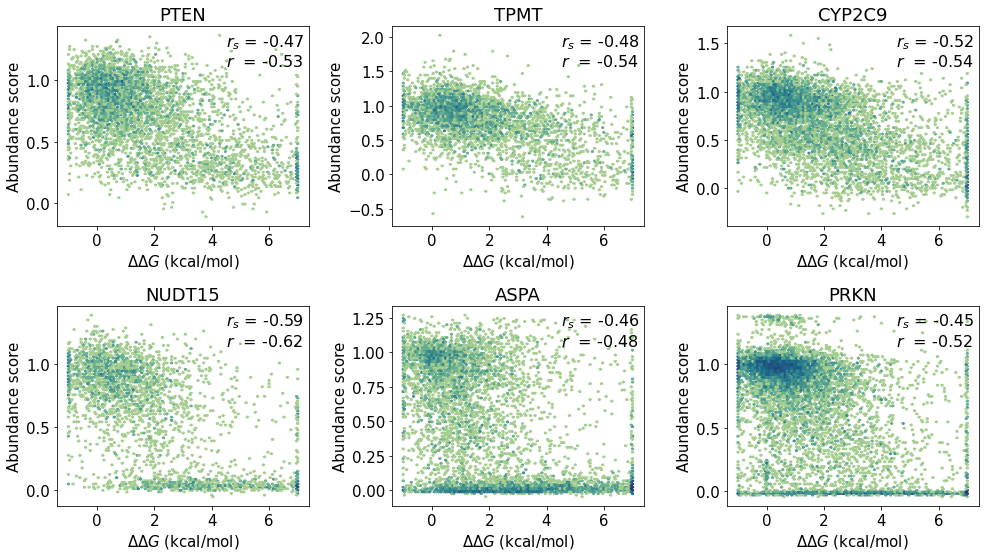

In [4]:
# plot correlations between abundance scores and Rosetta ddGs for all variants
plot_hexbin_feat_abundance(vamp_struc_ddg_df, "mean_ddG_in_range", r'$\Delta\Delta G$ (kcal/mol)')

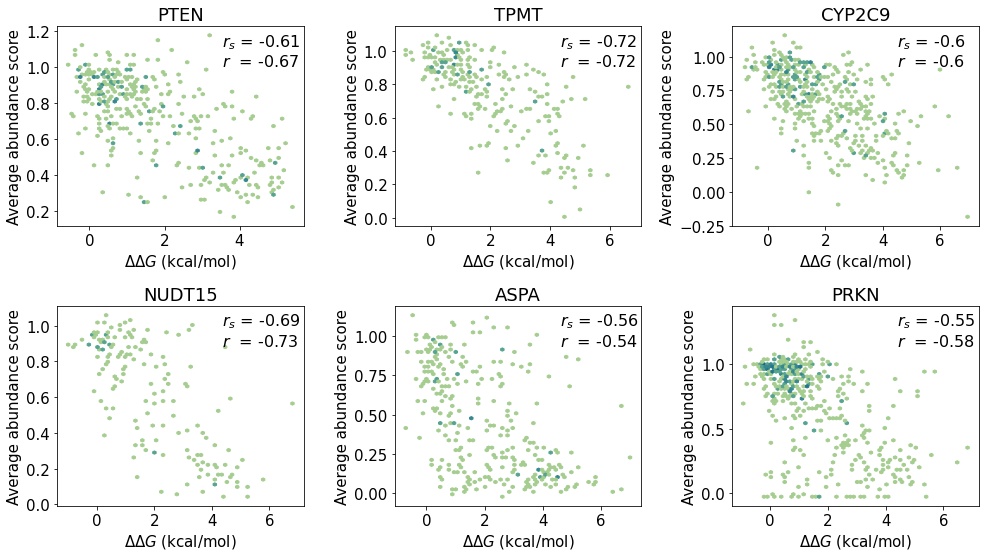

In [5]:
# plot correlations between abundance scores and Rosetta ddGs using residue-averaged values
plot_hexbin_feat_abundance(vamp_struc_ddg_df, "mean_ddG_in_range", r'$\Delta\Delta G$ (kcal/mol)',resi_level=True)

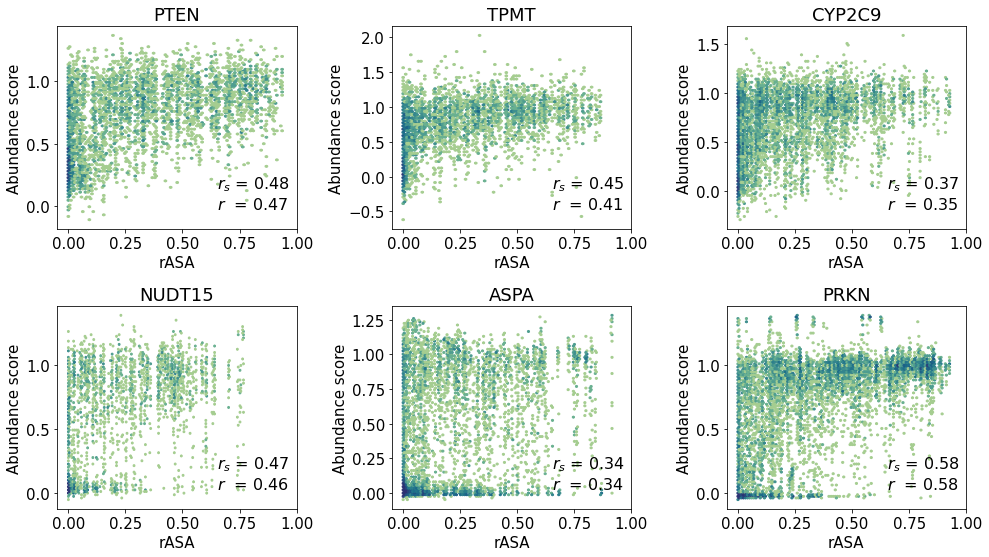

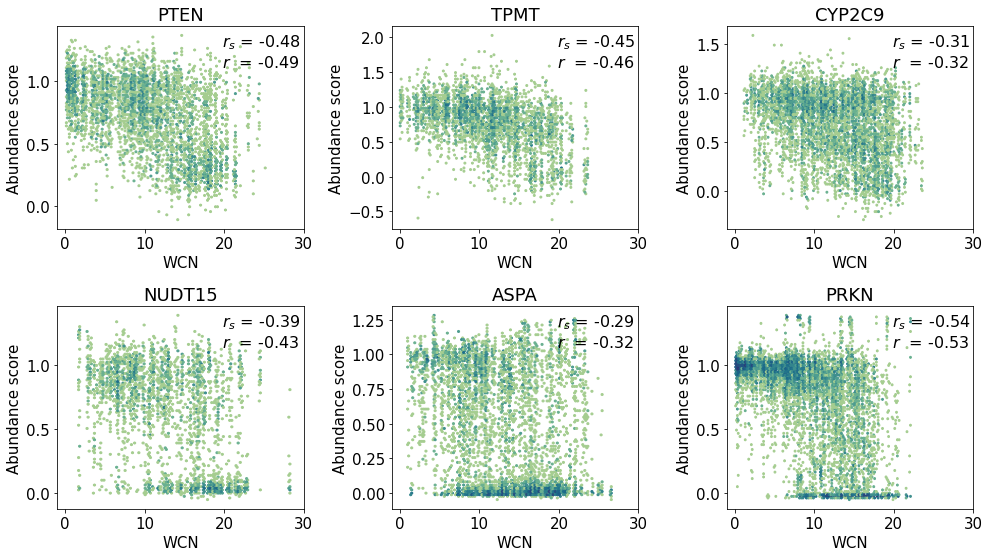

In [6]:
# plot correlations between abundance scores and rASA or WCN values for all variants
for struc_feat,xlabel in zip(["rASA","WCN"],["rASA","WCN"]):
    plot_hexbin_feat_abundance(vamp_struc_ddg_df, struc_feat, xlabel, resi_level = False)

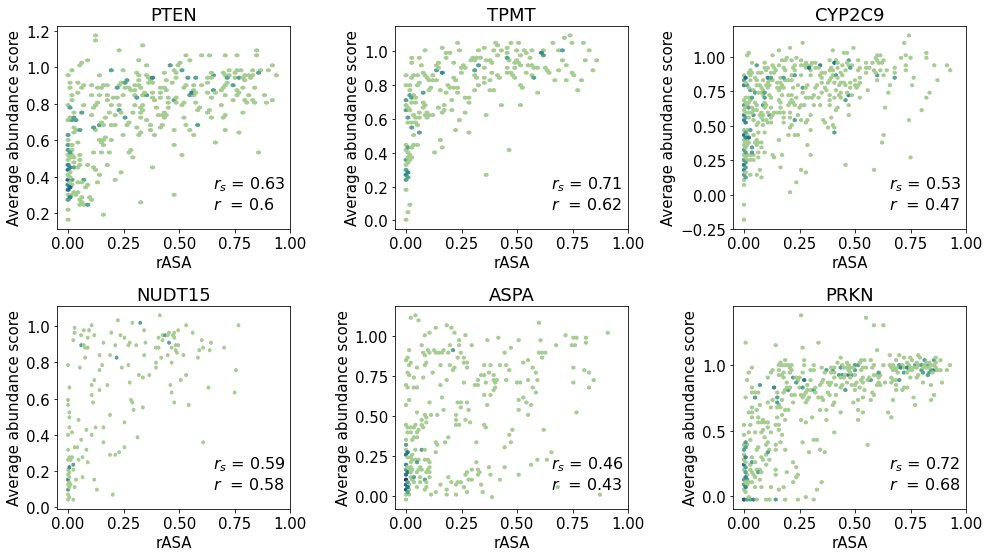

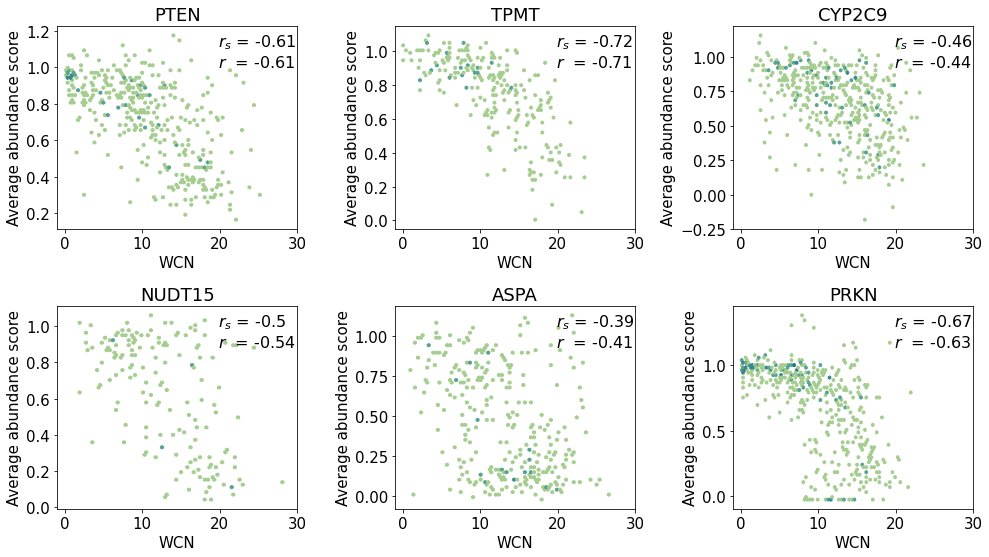

In [7]:
# plot correlations between abundance scores and rASA or WCN values using residue-averaged abundance scores
for struc_feat,xlabel in zip(["rASA","WCN"],["rASA","WCN"]):
    plot_hexbin_feat_abundance(vamp_struc_ddg_df, struc_feat, xlabel, resi_level = True)